# Импорт библиотек и подготовка данных

In [54]:
# импорт библиотек 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [55]:
# импорт датасета
data = pd.read_csv('insurance_data.csv')
data.head()

,TXN_DATE_TIME,TRANSACTION_ID,CUSTOMER_ID,POLICY_NUMBER,POLICY_EFF_DT,LOSS_DT,REPORT_DT,INSURANCE_TYPE,PREMIUM_AMOUNT,CLAIM_AMOUNT,...,CLAIM_STATUS,INCIDENT_SEVERITY,AUTHORITY_CONTACTED,ANY_INJURY,POLICE_REPORT_AVAILABLE,INCIDENT_STATE,INCIDENT_CITY,INCIDENT_HOUR_OF_THE_DAY,AGENT_ID,VENDOR_ID
0,6/1/2020 0:00,TXN00000001,A00003822,PLC00008468,6/23/2015,5/16/2020,5/21/2020,Health,157.13,9000,...,A,Major Loss,Police,0,1,GA,Savannah,4,AGENT00413,VNDR00556
1,6/1/2020 0:00,TXN00000002,A00008149,PLC00009594,4/21/2018,5/13/2020,5/18/2020,Property,141.71,26000,...,A,Total Loss,Ambulance,1,0,AL,Montgomery,0,AGENT00769,VNDR00592
2,6/1/2020 0:00,TXN00000003,A00003172,PLC00007969,10/3/2019,5/21/2020,5/26/2020,Property,157.24,13000,...,A,Total Loss,Police,0,1,CO,Grand Junction,19,AGENT00883,VNDR00031
3,6/1/2020 0:00,TXN00000004,A00007572,PLC00009292,11/29/2016,5/14/2020,5/19/2020,Health,172.87,16000,...,A,Minor Loss,Ambulance,0,0,GA,Savannah,12,AGENT00278,VNDR00075
4,6/1/2020 0:00,TXN00000005,A00008173,PLC00000204,12/26/2011,5/17/2020,5/22/2020,Travel,88.53,3000,...,A,Major Loss,Police,0,1,TN,Nashville,18,AGENT00636,VNDR00472


In [56]:
# удаление ненужных столбцов 
data = data.drop(['TXN_DATE_TIME'], axis=1)
data = data.drop(['TRANSACTION_ID'], axis=1)
data = data.drop(['CUSTOMER_ID'], axis=1)
data = data.drop(['POLICY_NUMBER'], axis=1)
data = data.drop(['POLICY_EFF_DT'], axis=1)
data = data.drop(['LOSS_DT'], axis=1)
data = data.drop(['REPORT_DT'], axis=1)
data = data.drop(['CUSTOMER_NAME'], axis=1)
data = data.drop(['INCIDENT_STATE'], axis=1)
data = data.drop(['INCIDENT_CITY'], axis=1)
data = data.drop(['AGENT_ID'], axis=1)
data = data.drop(['VENDOR_ID'], axis=1)
data = data.drop(['ADDRESS_LINE1'], axis=1)
data = data.drop(['ADDRESS_LINE2'], axis=1)
data = data.drop(['POSTAL_CODE'], axis=1)
data = data.drop(['ROUTING_NUMBER'], axis=1)
data = data.drop(['SSN'], axis=1)
data = data.drop(['ACCT_NUMBER'], axis=1)
data = data.drop(['CITY'], axis=1)
data = data.drop(['STATE'], axis=1)

In [57]:
# проверяем, все ли удалилось
data.head()

,INSURANCE_TYPE,PREMIUM_AMOUNT,CLAIM_AMOUNT,MARITAL_STATUS,AGE,TENURE,EMPLOYMENT_STATUS,NO_OF_FAMILY_MEMBERS,RISK_SEGMENTATION,HOUSE_TYPE,SOCIAL_CLASS,CUSTOMER_EDUCATION_LEVEL,CLAIM_STATUS,INCIDENT_SEVERITY,AUTHORITY_CONTACTED,ANY_INJURY,POLICE_REPORT_AVAILABLE,INCIDENT_HOUR_OF_THE_DAY
0,Health,157.13,9000,Y,54,89,Y,3,L,Own,LI,Bachelor,A,Major Loss,Police,0,1,4
1,Property,141.71,26000,N,61,80,Y,4,L,Rent,MI,Bachelor,A,Total Loss,Ambulance,1,0,0
2,Property,157.24,13000,N,47,68,Y,6,L,Rent,MI,PhD,A,Total Loss,Police,0,1,19
3,Health,172.87,16000,Y,36,16,Y,7,L,Mortgage,MI,Masters,A,Minor Loss,Ambulance,0,0,12
4,Travel,88.53,3000,Y,51,16,Y,2,M,Rent,HI,Masters,A,Major Loss,Police,0,1,18


In [58]:
data['CLAIM_STATUS'].unique()

array(['A', 'D'], dtype=object)

In [59]:
data['INSURANCE_TYPE'].unique()

array(['Health', 'Property', 'Travel', 'Life', 'Motor', 'Mobile'],
      dtype=object)

In [60]:
data['MARITAL_STATUS'].unique()

array(['Y', 'N'], dtype=object)

In [61]:
data['SOCIAL_CLASS'].unique()

array(['LI', 'MI', 'HI'], dtype=object)

In [62]:
data['RISK_SEGMENTATION'].unique()

array(['L', 'M', 'H'], dtype=object)

In [63]:
data['EMPLOYMENT_STATUS'].unique()

array(['Y', 'N'], dtype=object)

In [64]:
data['CUSTOMER_EDUCATION_LEVEL'] = data['CUSTOMER_EDUCATION_LEVEL'].fillna(0)

In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   INSURANCE_TYPE            10000 non-null  object 
 1   PREMIUM_AMOUNT            10000 non-null  float64
 2   CLAIM_AMOUNT              10000 non-null  int64  
 3   MARITAL_STATUS            10000 non-null  object 
 4   AGE                       10000 non-null  int64  
 5   TENURE                    10000 non-null  int64  
 6   EMPLOYMENT_STATUS         10000 non-null  object 
 7   NO_OF_FAMILY_MEMBERS      10000 non-null  int64  
 8   RISK_SEGMENTATION         10000 non-null  object 
 9   HOUSE_TYPE                10000 non-null  object 
 10  SOCIAL_CLASS              10000 non-null  object 
 11  CUSTOMER_EDUCATION_LEVEL  10000 non-null  object 
 12  CLAIM_STATUS              10000 non-null  object 
 13  INCIDENT_SEVERITY         10000 non-null  object 
 14  AUTHORI

Смотрим карту корреляции 

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_27196\1535875433.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True)


<Axes: >

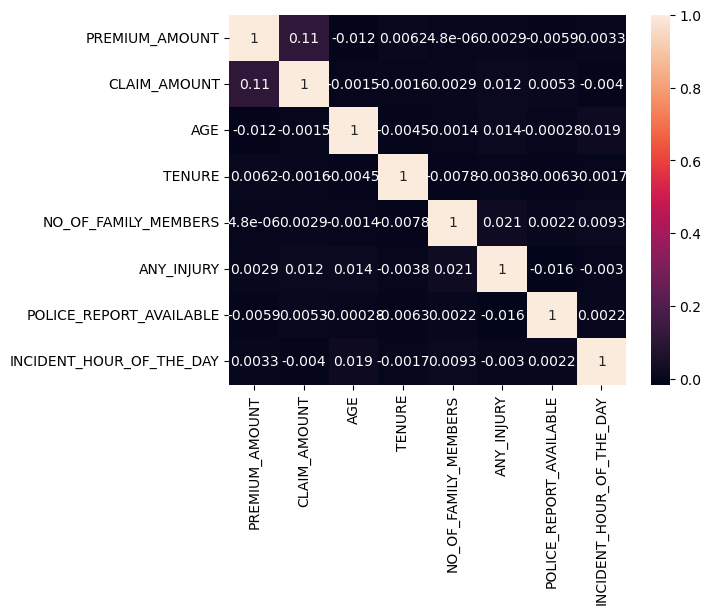

In [66]:
import seaborn as sns
from scipy.stats import norm 
sns.heatmap(data.corr(), annot=True)

# Кодируем данные с помощью get dummies и loc

In [67]:
dumm1 = pd.get_dummies( data['INSURANCE_TYPE'] )
data = pd.concat([data,dumm1], axis =  1 )
data=data.drop(['INSURANCE_TYPE'], axis=1)

In [68]:
data.head()

,PREMIUM_AMOUNT,CLAIM_AMOUNT,MARITAL_STATUS,AGE,TENURE,EMPLOYMENT_STATUS,NO_OF_FAMILY_MEMBERS,RISK_SEGMENTATION,HOUSE_TYPE,SOCIAL_CLASS,...,AUTHORITY_CONTACTED,ANY_INJURY,POLICE_REPORT_AVAILABLE,INCIDENT_HOUR_OF_THE_DAY,Health,Life,Mobile,Motor,Property,Travel
0,157.13,9000,Y,54,89,Y,3,L,Own,LI,...,Police,0,1,4,1,0,0,0,0,0
1,141.71,26000,N,61,80,Y,4,L,Rent,MI,...,Ambulance,1,0,0,0,0,0,0,1,0
2,157.24,13000,N,47,68,Y,6,L,Rent,MI,...,Police,0,1,19,0,0,0,0,1,0
3,172.87,16000,Y,36,16,Y,7,L,Mortgage,MI,...,Ambulance,0,0,12,1,0,0,0,0,0
4,88.53,3000,Y,51,16,Y,2,M,Rent,HI,...,Police,0,1,18,0,0,0,0,0,1


In [69]:
#для Gender
data.loc[data['EMPLOYMENT_STATUS'] == 'Y', 'EMPLOYMENT_STATUS'] = 0
data.loc[data['EMPLOYMENT_STATUS'] == 'N', 'EMPLOYMENT_STATUS'] = 1

In [70]:
data.loc[data['RISK_SEGMENTATION'] == 'L', 'RISK_SEGMENTATION'] = 0
data.loc[data['RISK_SEGMENTATION'] == 'M', 'RISK_SEGMENTATION'] = 1
data.loc[data['RISK_SEGMENTATION'] == 'H', 'RISK_SEGMENTATION'] = 2

In [71]:
data['RISK_SEGMENTATION'].unique()

array([0, 1, 2], dtype=object)

In [72]:
data.loc[data['HOUSE_TYPE'] == 'Own', 'HOUSE_TYPE'] = 0
data.loc[data['HOUSE_TYPE'] == 'Rent', 'HOUSE_TYPE'] = 1
data.loc[data['HOUSE_TYPE'] == 'Mortgage', 'HOUSE_TYPE'] = 2

In [73]:
data['HOUSE_TYPE'].unique()

array([0, 1, 2], dtype=object)

In [74]:
data.loc[data['CUSTOMER_EDUCATION_LEVEL'] == 'MD', 'CUSTOMER_EDUCATION_LEVEL'] = 0
data.loc[data['CUSTOMER_EDUCATION_LEVEL'] == 'Masters', 'CUSTOMER_EDUCATION_LEVEL'] = 1
data.loc[data['CUSTOMER_EDUCATION_LEVEL'] == 'PhD', 'CUSTOMER_EDUCATION_LEVEL'] = 2
data.loc[data['CUSTOMER_EDUCATION_LEVEL'] == 'Bachelor', 'CUSTOMER_EDUCATION_LEVEL'] = 3
data.loc[data['CUSTOMER_EDUCATION_LEVEL'] == 'College', 'CUSTOMER_EDUCATION_LEVEL'] = 4
data.loc[data['CUSTOMER_EDUCATION_LEVEL'] == 'High School', 'CUSTOMER_EDUCATION_LEVEL'] = 5
data.loc[data['CUSTOMER_EDUCATION_LEVEL'] == '0', 'CUSTOMER_EDUCATION_LEVEL'] = 6


In [75]:
data['CUSTOMER_EDUCATION_LEVEL'].unique()

array([3, 2, 1, 4, 0, 5], dtype=object)

In [76]:
data.loc[data['SOCIAL_CLASS'] == 'LI', 'SOCIAL_CLASS'] = 0
data.loc[data['SOCIAL_CLASS'] == 'MI', 'SOCIAL_CLASS'] = 1
data.loc[data['SOCIAL_CLASS'] == 'HI', 'SOCIAL_CLASS'] = 2

In [77]:
data['SOCIAL_CLASS'].unique()

array([0, 1, 2], dtype=object)

повторно смотрим на карту корреляции, так как она могла изменится из за новых переменных

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_27196\1535875433.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True)


<Axes: >

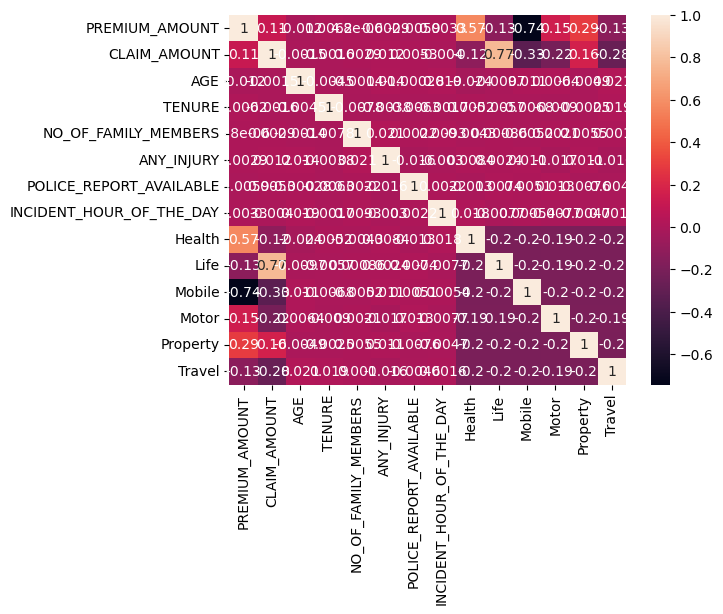

In [78]:
import seaborn as sns
from scipy.stats import norm 
sns.heatmap(data.corr(), annot=True)

In [79]:
correlation = data.corr()
correlation

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_27196\3106392754.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = data.corr()


,PREMIUM_AMOUNT,CLAIM_AMOUNT,AGE,TENURE,NO_OF_FAMILY_MEMBERS,ANY_INJURY,POLICE_REPORT_AVAILABLE,INCIDENT_HOUR_OF_THE_DAY,Health,Life,Mobile,Motor,Property,Travel
PREMIUM_AMOUNT,1.000000,0.109210,-0.011634,0.006190,0.000005,0.002934,-0.005905,0.003341,0.568202,-0.128658,-0.742875,0.148224,0.289991,-0.131354
CLAIM_AMOUNT,0.109210,1.000000,-0.001530,-0.001614,0.002860,0.011707,0.005282,-0.004010,-0.117930,0.771818,-0.330882,-0.216924,0.164039,-0.276013
AGE,-0.011634,-0.001530,1.000000,-0.004507,-0.001442,0.013887,-0.000285,0.019089,-0.024022,-0.009657,0.010940,0.006399,-0.004855,0.021456
TENURE,0.006190,-0.001614,-0.004507,1.000000,-0.007814,-0.003832,-0.006269,-0.001705,0.005248,-0.005703,-0.006804,-0.009017,-0.002514,0.018618
NO_OF_FAMILY_MEMBERS,0.000005,0.002860,-0.001442,-0.007814,1.000000,0.020829,0.002198,0.009265,-0.004269,0.000860,-0.005198,0.002126,0.005549,0.000998
ANY_INJURY,0.002934,0.011707,0.013887,-0.003832,0.020829,1.000000,-0.015769,-0.003030,0.008448,0.002398,0.010539,-0.016993,0.011120,-0.016074
POLICE_REPORT_AVAILABLE,-0.005905,0.005282,-0.000285,-0.006269,0.002198,-0.015769,1.000000,0.002190,-0.013206,0.007366,0.005078,0.013412,-0.007642,-0.004635
INCIDENT_HOUR_OF_THE_DAY,0.003341,-0.004010,0.019089,-0.001705,0.009265,-0.003030,0.002190,1.000000,0.017587,-0.007656,0.000544,-0.007694,-0.004653,0.001650
Health,0.568202,-0.117930,-0.024022,0.005248,-0.004269,0.008448,-0.013206,0.017587,1.000000,-0.202790,-0.203514,-0.194910,-0.203514,-0.201920
Life,-0.128658,0.771818,-0.009657,-0.005703,0.000860,0.002398,0.007366,-0.007656,-0.202790,1.000000,-0.202934,-0.194355,-0.202934,-0.201344


Можно увидеть, что хорошая корреляция между выплатой страховки и страховки на жизнь. 
Также хорошая корреляция между страховкой на здоровье и ежемесячной выплатой стоимости страховки.
Есть небольшая корреляция между ежемесячной выплатой стоимости страховки и Property.

In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   PREMIUM_AMOUNT            10000 non-null  float64
 1   CLAIM_AMOUNT              10000 non-null  int64  
 2   MARITAL_STATUS            10000 non-null  object 
 3   AGE                       10000 non-null  int64  
 4   TENURE                    10000 non-null  int64  
 5   EMPLOYMENT_STATUS         10000 non-null  object 
 6   NO_OF_FAMILY_MEMBERS      10000 non-null  int64  
 7   RISK_SEGMENTATION         10000 non-null  object 
 8   HOUSE_TYPE                10000 non-null  object 
 9   SOCIAL_CLASS              10000 non-null  object 
 10  CUSTOMER_EDUCATION_LEVEL  10000 non-null  object 
 11  CLAIM_STATUS              10000 non-null  object 
 12  INCIDENT_SEVERITY         10000 non-null  object 
 13  AUTHORITY_CONTACTED       10000 non-null  object 
 14  ANY_INJ




## Кодируем оставшиеся данные

In [81]:
data['INCIDENT_SEVERITY'].unique()

array(['Major Loss', 'Total Loss', 'Minor Loss'], dtype=object)

In [82]:
data.loc[data['INCIDENT_SEVERITY'] == 'Minor Loss', 'INCIDENT_SEVERITY'] = 0
data.loc[data['INCIDENT_SEVERITY'] == 'Major Loss', 'INCIDENT_SEVERITY'] = 1
data.loc[data['INCIDENT_SEVERITY'] == 'Total Loss', 'INCIDENT_SEVERITY'] = 2

In [83]:
data['INCIDENT_SEVERITY'].unique()

array([1, 2, 0], dtype=object)

In [84]:
data.loc[data['AUTHORITY_CONTACTED'] == 'None', 'AUTHORITY_CONTACTED'] = 0
data.loc[data['AUTHORITY_CONTACTED'] == 'Other', 'AUTHORITY_CONTACTED'] = 1
data.loc[data['AUTHORITY_CONTACTED'] == 'Ambulance', 'AUTHORITY_CONTACTED'] = 2
data.loc[data['AUTHORITY_CONTACTED'] == 'Police', 'AUTHORITY_CONTACTED'] = 3

## меняем тип данных с object на float


In [85]:
data['EMPLOYMENT_STATUS'] = data['EMPLOYMENT_STATUS'].astype(float)
data['RISK_SEGMENTATION'] = data['RISK_SEGMENTATION'].astype(float)
data['HOUSE_TYPE'] = data['HOUSE_TYPE'].astype(float)
data['SOCIAL_CLASS'] = data['SOCIAL_CLASS'].astype(float)
data['CUSTOMER_EDUCATION_LEVEL'] = data['CUSTOMER_EDUCATION_LEVEL'].astype(float)
data['CLAIM_STATUS'] = data['EMPLOYMENT_STATUS'].astype(float)
data['INCIDENT_SEVERITY'] = data['INCIDENT_SEVERITY'].astype(float)
data['AUTHORITY_CONTACTED'] = data['AUTHORITY_CONTACTED'].astype(float)
data['MARITAL_STATUS'] = data['AUTHORITY_CONTACTED'].astype(float)


In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   PREMIUM_AMOUNT            10000 non-null  float64
 1   CLAIM_AMOUNT              10000 non-null  int64  
 2   MARITAL_STATUS            10000 non-null  float64
 3   AGE                       10000 non-null  int64  
 4   TENURE                    10000 non-null  int64  
 5   EMPLOYMENT_STATUS         10000 non-null  float64
 6   NO_OF_FAMILY_MEMBERS      10000 non-null  int64  
 7   RISK_SEGMENTATION         10000 non-null  float64
 8   HOUSE_TYPE                10000 non-null  float64
 9   SOCIAL_CLASS              10000 non-null  float64
 10  CUSTOMER_EDUCATION_LEVEL  10000 non-null  float64
 11  CLAIM_STATUS              10000 non-null  float64
 12  INCIDENT_SEVERITY         10000 non-null  float64
 13  AUTHORITY_CONTACTED       10000 non-null  float64
 14  ANY_INJ

In [87]:
correlation = data.corr()
correlation

,PREMIUM_AMOUNT,CLAIM_AMOUNT,MARITAL_STATUS,AGE,TENURE,EMPLOYMENT_STATUS,NO_OF_FAMILY_MEMBERS,RISK_SEGMENTATION,HOUSE_TYPE,SOCIAL_CLASS,...,AUTHORITY_CONTACTED,ANY_INJURY,POLICE_REPORT_AVAILABLE,INCIDENT_HOUR_OF_THE_DAY,Health,Life,Mobile,Motor,Property,Travel
PREMIUM_AMOUNT,1.000000,0.109210,0.001176,-0.011634,0.006190,-0.011419,0.000005,-0.009907,-0.015695,-0.017473,...,0.001176,0.002934,-0.005905,0.003341,0.568202,-0.128658,-0.742875,0.148224,0.289991,-0.131354
CLAIM_AMOUNT,0.109210,1.000000,-0.003962,-0.001530,-0.001614,-0.010604,0.002860,0.003704,0.002359,0.003312,...,-0.003962,0.011707,0.005282,-0.004010,-0.117930,0.771818,-0.330882,-0.216924,0.164039,-0.276013
MARITAL_STATUS,0.001176,-0.003962,1.000000,0.003548,0.008559,0.003543,0.026341,0.004471,0.005878,0.001547,...,1.000000,-0.006825,-0.008605,0.004196,0.000733,-0.007662,0.004826,-0.014432,0.011822,0.004304
AGE,-0.011634,-0.001530,0.003548,1.000000,-0.004507,0.002160,-0.001442,-0.004140,-0.007727,-0.012781,...,0.003548,0.013887,-0.000285,0.019089,-0.024022,-0.009657,0.010940,0.006399,-0.004855,0.021456
TENURE,0.006190,-0.001614,0.008559,-0.004507,1.000000,-0.001327,-0.007814,-0.008710,-0.004448,-0.010122,...,0.008559,-0.003832,-0.006269,-0.001705,0.005248,-0.005703,-0.006804,-0.009017,-0.002514,0.018618
EMPLOYMENT_STATUS,-0.011419,-0.010604,0.003543,0.002160,-0.001327,1.000000,0.004896,0.002427,-0.006766,-0.009778,...,0.003543,0.010632,0.002098,0.002388,-0.009775,-0.015938,0.018121,0.006488,0.006513,-0.005293
NO_OF_FAMILY_MEMBERS,0.000005,0.002860,0.026341,-0.001442,-0.007814,0.004896,1.000000,-0.011090,-0.021005,-0.004849,...,0.026341,0.020829,0.002198,0.009265,-0.004269,0.000860,-0.005198,0.002126,0.005549,0.000998
RISK_SEGMENTATION,-0.009907,0.003704,0.004471,-0.004140,-0.008710,0.002427,-0.011090,1.000000,-0.005144,-0.002732,...,0.004471,0.000418,0.005474,0.009716,-0.005344,0.005493,0.011124,-0.016817,0.016412,-0.011399
HOUSE_TYPE,-0.015695,0.002359,0.005878,-0.007727,-0.004448,-0.006766,-0.021005,-0.005144,1.000000,0.003266,...,0.005878,-0.010406,-0.016139,0.014819,-0.029780,0.009273,0.013632,-0.004557,0.007050,0.004280
SOCIAL_CLASS,-0.017473,0.003312,0.001547,-0.012781,-0.010122,-0.009778,-0.004849,-0.002732,0.003266,1.000000,...,0.001547,-0.004119,-0.002461,0.008889,-0.010394,0.013241,0.017370,0.006487,-0.008891,-0.017692


# Обучение модели CatBoostRegressor

In [88]:
X = data.drop(['PREMIUM_AMOUNT'] , axis=1)
y = data['PREMIUM_AMOUNT']

In [89]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 42)

In [90]:
import catboost
from catboost import CatBoostRegressor
cat = CatBoostRegressor()

In [91]:
cat = CatBoostRegressor(iterations=100,learning_rate=1,depth=2)
cat.fit(X_train,y_train)

0:	learn: 24.9431487	total: 3.59ms	remaining: 355ms
1:	learn: 20.6499423	total: 6.83ms	remaining: 334ms
2:	learn: 19.5190651	total: 9.76ms	remaining: 316ms
3:	learn: 19.2411000	total: 12.9ms	remaining: 310ms
4:	learn: 19.1737783	total: 16ms	remaining: 303ms
5:	learn: 19.1619652	total: 18.5ms	remaining: 290ms
6:	learn: 19.1509009	total: 21.3ms	remaining: 282ms
7:	learn: 19.1380343	total: 23.8ms	remaining: 274ms
8:	learn: 19.1279485	total: 26.1ms	remaining: 264ms
9:	learn: 19.1185695	total: 28.2ms	remaining: 254ms
10:	learn: 19.0974364	total: 30.6ms	remaining: 247ms
11:	learn: 19.0860837	total: 32.7ms	remaining: 240ms
12:	learn: 19.0701493	total: 35ms	remaining: 234ms
13:	learn: 19.0582331	total: 37.2ms	remaining: 229ms
14:	learn: 19.0415440	total: 39.4ms	remaining: 223ms
15:	learn: 19.0312320	total: 41.6ms	remaining: 218ms
16:	learn: 19.0247113	total: 43.8ms	remaining: 214ms
17:	learn: 19.0080392	total: 46ms	remaining: 209ms
18:	learn: 18.9972353	total: 48.3ms	remaining: 206ms
19:	learn

In [92]:
y_pred = cat.predict(X_test)

In [93]:
y_pred

array([71.38815607,  7.0783861 , 79.37149319, ...,  7.1906496 ,
       70.93252995, 73.99846182])

In [94]:
score = cat.score(X_test, y_test)

In [95]:
score

0.8272879926073186

# Cross Validation for CatBoostRegressor

In [109]:
# Создаем объект KFold с 5 фолдами
kf = KFold(n_splits=5)

# Выполняем cross validation
scores = []
for train_idx, test_idx in kf.split(X):
    # Обучаем модель на обучающей выборке
    model = CatBoostRegressor()
    model.fit(X.iloc[train_idx], y.iloc[train_idx])

    # Оцениваем модель на тестовой выборке
    score = model.score(X.iloc[test_idx], y.iloc[test_idx])
    scores.append(score)

# Выводим результаты cross validation
print("Средний скор:", np.mean(scores))

Learning rate set to 0.056868
0:	learn: 45.9840590	total: 5.19ms	remaining: 5.19s
1:	learn: 43.8528362	total: 9.64ms	remaining: 4.81s
2:	learn: 41.8746143	total: 14.1ms	remaining: 4.69s
3:	learn: 40.1349169	total: 18.7ms	remaining: 4.65s
4:	learn: 38.5129958	total: 23.2ms	remaining: 4.61s
5:	learn: 36.8910364	total: 27.9ms	remaining: 4.62s
6:	learn: 35.3861644	total: 33ms	remaining: 4.68s
7:	learn: 33.9869642	total: 37.4ms	remaining: 4.64s
8:	learn: 32.6867136	total: 42.6ms	remaining: 4.69s
9:	learn: 31.5766902	total: 47.2ms	remaining: 4.67s
10:	learn: 30.4591225	total: 51.7ms	remaining: 4.64s
11:	learn: 29.4269696	total: 55.5ms	remaining: 4.57s
12:	learn: 28.4812851	total: 59.9ms	remaining: 4.54s
13:	learn: 27.6156199	total: 64.4ms	remaining: 4.54s
14:	learn: 26.8186650	total: 68.9ms	remaining: 4.53s
15:	learn: 26.1442900	total: 73.5ms	remaining: 4.52s
16:	learn: 25.4709698	total: 78ms	remaining: 4.51s
17:	learn: 24.8585529	total: 82.5ms	remaining: 4.5s
18:	learn: 24.2976961	total: 86

In [110]:
print("Средний скор:", np.mean(scores))

Средний скор: 0.8320429038341342


In [96]:



# Создаем объект KFold с 5 фолдами
#kf = KFold(n_splits=5)

# Выполняем cross validation
#scores = []
#for train_idx, test_idx in kf.split(X):
    # Обучаем модель на обучающей выборке
    #model = CatBoostRegressor()
    #model.fit(X.iloc[train_idx], y.iloc[train_idx])

    # Оцениваем модель на тестовой выборке
    #score = model.score(X.iloc[test_idx], y.iloc[test_idx])
    #scores.append(score)

# Выводим результаты cross validation
#print("Средний скор:", np.mean(scores))

In [102]:
#print("Средний скор:", np.mean(scores))

# Liner Regression 

In [117]:
from sklearn.linear_model import LinearRegression

In [118]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [119]:
y_pred1 = model.predict(X_test)

In [120]:
score = model.score(X_test, y_test)
score

0.839605223052023

In [121]:
from sklearn.model_selection import cross_val_score

In [122]:
# Выполняем cross validation
scores = cross_val_score(LinearRegression(), X, y, cv=5)

# Выводим результаты cross validation
print("Средний скор:", np.mean(scores))

Средний скор: 0.8425622575983989


# Cross Validation for LinearRegression

In [123]:
# Создаем объект KFold с 5 фолдами
kf = KFold(n_splits=5)

# Выполняем cross validation
scores = []
for train_idx, test_idx in kf.split(X):
    # Обучаем модель на обучающей выборке
    model = LinearRegression()
    model.fit(X.iloc[train_idx], y.iloc[train_idx])

    # Оцениваем модель на тестовой выборке
    score = model.score(X.iloc[test_idx], y.iloc[test_idx])
    scores.append(score)

# Выводим результаты cross validation
print("Средний скор:", np.mean(scores))

Средний скор: 0.8425622575983989


In [141]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   PREMIUM_AMOUNT            10000 non-null  float64
 1   CLAIM_AMOUNT              10000 non-null  int64  
 2   MARITAL_STATUS            10000 non-null  float64
 3   AGE                       10000 non-null  int64  
 4   TENURE                    10000 non-null  int64  
 5   EMPLOYMENT_STATUS         10000 non-null  float64
 6   NO_OF_FAMILY_MEMBERS      10000 non-null  int64  
 7   RISK_SEGMENTATION         10000 non-null  float64
 8   HOUSE_TYPE                10000 non-null  float64
 9   SOCIAL_CLASS              10000 non-null  float64
 10  CUSTOMER_EDUCATION_LEVEL  10000 non-null  float64
 11  CLAIM_STATUS              10000 non-null  float64
 12  INCIDENT_SEVERITY         10000 non-null  float64
 13  AUTHORITY_CONTACTED       10000 non-null  float64
 14  ANY_INJ

In [148]:
new_candidates = {'PREMIUM_AMOUNT': [145,157,158,250,166],
                  'CLAIM_AMOUNT': [2000,3500,1100,8000,5000],
                  'MARITAL_STATUS': [2,3,2,1,1],
                  'AGE': [35,40,20,60,55],
                  'TENURE':[50,88,25,66,31],
                  'EMPLOYMENT_STATUS':[1,0,0,1,1],
                  'NO_OF_FAMILY_MEMBERS':[7,7,5,6,1],
                  'RISK_SEGMENTATION':[0,1,2,2,0],
                  'HOUSE_TYPE':[1,2,3,1,2],
                  'SOCIAL_CLASS':[1,2,0,1,2],
                  'CUSTOMER_EDUCATION_LEVEL':[1,2,5,1,4],
                  'CLAIM_STATUS':[1,0,0,1,0],
                  'INCIDENT_SEVERITY':[1,2,0,1,2],
                  'AUTHORITY_CONTACTED':[1,2,0,1,3],
                  'ANY_INJURY':[1,1,0,0,1],
                  'POLICE_REPORT_AVAILABLE':[1,0,0,1,0],
                  'INCIDENT_HOUR_OF_THE_DAY':[22,16,12,13,8],
                  'Health':[1,1,0,1,1],
                  'Life':[1,1,0,0,0],
                  'Mobile':[0,0,1,1,0],
                  'Motor':[1,1,0,1,0],
                  'Property':[0,1,1,1,0],
                  'Travel':[1,1,0,0,1] }

data2 = pd.DataFrame(new_candidates,columns= ['PREMIUM_AMOUNT','CLAIM_AMOUNT', 'MARITAL_STATUS', 'AGE', 'TENURE', 'EMPLOYMENT_STATUS', 'NO_OF_FAMILY_MEMBERS', 'RISK_SEGMENTATION', 'HOUSE_TYPE','SOCIAL_CLASS','CUSTOMER_EDUCATION_LEVEL','CLAIM_STATUS','INCIDENT_SEVERITY','AUTHORITY_CONTACTED','ANY_INJURY','POLICE_REPORT_AVAILABLE','INCIDENT_HOUR_OF_THE_DAY','Health','Life','Mobile','Motor','Property','Travel' ])
y_pred = model.predict(data2)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- PREMIUM_AMOUNT


In [145]:
data['INCIDENT_HOUR_OF_THE_DAY'].unique()

array([ 4,  0, 19, 12, 18, 10, 22, 23,  3, 11,  2, 14, 20,  1,  7, 13, 17,
        8,  6, 16,  5, 21,  9, 15], dtype=int64)